In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential
import plotly.graph_objects as go

Using TensorFlow backend.


In [2]:
df_copy = pd.read_csv('bikes_updated.csv')
print(f'Shape of our dataset is : {df_copy.shape}')
df_copy.head()

Shape of our dataset is : (17379, 14)


,casual,holiday,humidity,season,temp,weather,windspeed,workingday,year,month_of_year,hour_of_day,weekday,weekday_cycle,hour_class
0,3.0,not_holiday,81,season_spring,9.84,weather_clear,0.0,not_working,2011,jan,0,saturday,weekend,down_hours
1,8.0,not_holiday,80,season_spring,9.02,weather_clear,0.0,not_working,2011,jan,1,saturday,weekend,down_hours
2,5.0,not_holiday,80,season_spring,9.02,weather_clear,0.0,not_working,2011,jan,2,saturday,weekend,down_hours
3,3.0,not_holiday,75,season_spring,9.84,weather_clear,0.0,not_working,2011,jan,3,saturday,weekend,down_hours
4,0.0,not_holiday,75,season_spring,9.84,weather_clear,0.0,not_working,2011,jan,4,saturday,weekend,down_hours


In [3]:
def one_hot_encoder(orig_df, cat_cols):
    for each_col in cat_cols:
        dummies = pd.get_dummies(orig_df[each_col], prefix=each_col, drop_first=False)
        orig_df = pd.concat([orig_df, dummies], axis=1)
        new_df = orig_df.drop(orig_df[cat_cols],axis=1)
    return new_df

In [4]:
categorical_columns = ['holiday','season','weather','workingday','year','month_of_year','hour_of_day','weekday','weekday_cycle','hour_class']

data = one_hot_encoder(df_copy, categorical_columns)

In [5]:
scaling_columns = ['temp','humidity','windspeed']

data[scaling_columns] = StandardScaler().fit_transform(data[scaling_columns])
data.shape

(17379, 66)

In [6]:
test_data = data[data['casual'].isnull()]
test_data.drop('casual',axis=1,inplace=True)
f'Shape of testing unseen data is : {test_data.shape}'

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



'Shape of testing unseen data is : (6493, 65)'

In [7]:
train_data = data[data['casual'].notnull()]
f'Shape of training unseen data is : {train_data.shape}'

'Shape of training unseen data is : (10886, 66)'

#### Segregating Target and Independent Columns

In [8]:
Y = ['casual']

X_Data = train_data.drop(Y,axis=1)
Y_Target = train_data[Y]

print(f'Shape of Training set is : {X_Data.shape}')
print(f'Shape of Target set is   : {Y_Target.shape}')

Shape of Training set is : (10886, 65)
Shape of Target set is   : (10886, 1)


#### Train Test Split Data

In [9]:
X_train, x_val, Y_train, y_val = train_test_split(X_Data, Y_Target, test_size = 0.2)

X_train, x_val, Y_train, y_val = X_train.values, x_val.values, Y_train.values, y_val.values

print(f'Shape of Training set is    : {X_train.shape}')
print(f'Shape of Validation set is  : {x_val.shape}')
print(f'Shape of Testing set is     : {test_data.shape}')

Shape of Training set is    : (8708, 65)
Shape of Validation set is  : (2178, 65)
Shape of Testing set is     : (6493, 65)


### Model Architecture 1

In [36]:
model = Sequential()
model.add(Dense(32, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['msle', 'mse'])
#history = model.fit(X_train, Y_train, batch_size = 64, epochs = 5,  validation_data=(x_val, y_val))
history = model.fit(X_train, Y_train, batch_size = 64, epochs = 50)


Epoch 1/50
8708/8708 [==============================] - 1s 127us/step - loss: 2587.8362 - mean_squared_logarithmic_error: 3.3925 - mean_squared_error: 2587.8362
Epoch 2/50
8708/8708 [==============================] - 0s 26us/step - loss: 794.5408 - mean_squared_logarithmic_error: 1.0210 - mean_squared_error: 794.5408
Epoch 3/50
8708/8708 [==============================] - 0s 25us/step - loss: 526.2476 - mean_squared_logarithmic_error: 0.6691 - mean_squared_error: 526.2476
Epoch 4/50
8708/8708 [==============================] - 0s 25us/step - loss: 412.3582 - mean_squared_logarithmic_error: 0.5187 - mean_squared_error: 412.3582
Epoch 5/50
8708/8708 [==============================] - 0s 25us/step - loss: 354.9559 - mean_squared_logarithmic_error: 0.4833 - mean_squared_error: 354.9559
Epoch 6/50
8708/8708 [==============================] - 0s 25us/step - loss: 323.1368 - mean_squared_logarithmic_error: 0.4416 - mean_squared_error: 323.1368
Epoch 7/50
8708/8708 [===========================

  Prediction  Actual
0     [25.0]    24.0
1      [2.0]     1.0
2     [29.0]    34.0
3     [37.0]    45.0
4      [4.0]     1.0


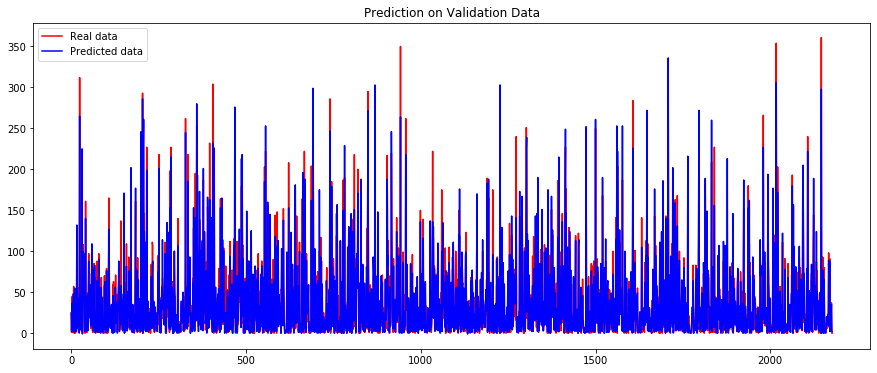

In [37]:
y_pred = model.predict(x_val)
y_pred =[np.round(value) for value in y_pred]

comparison_tbl = pd.DataFrame()
comparison_tbl["Prediction"] = y_pred
comparison_tbl["Actual"] = y_val
print(comparison_tbl[['Prediction','Actual']].head())


plt.figure(figsize=(15,6))
plt.plot(y_val, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction on Validation Data')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import explained_variance_score, mean_squared_error,r2_score, mean_squared_log_error, mean_absolute_error
# MSLE can not handle negative values
# EVS - It explains th total variance that is explained by varibles that are actually present and isn't due to error variance.

print(f'Explained Variance Score          : {explained_variance_score(y_val, y_pred)}')
print(f'Root Mean Squared Error           : {np.sqrt(mean_squared_error(y_val, y_pred))}')
print(f'Mean Squared Error                : {mean_absolute_error(y_val, y_pred)}')
print(f'R^2 Coefficient of Determination  : {r2_score(y_val, y_pred)}')
#print(f'RMSLE Root Mean Squared Log Error : {np.sqrt(mean_squared_log_error(y_val, y_pred))}')

Explained Variance Score          : 0.899816115482587
Root Mean Squared Error           : 16.22385584941476
Mean Squared Error                : 9.158402203856749
R^2 Coefficient of Determination  : 0.8998078471133065


#### Evaluating Model Loss on Validation Data

In [39]:
for loss_name, loss_value in zip(model.metrics_names, model.evaluate(x_val, y_val)):
    print(f'For {loss_name} loss is : {loss_value}')

2178/2178 [==============================] - 0s 156us/step
For loss loss is : 263.3944092225985
For mean_squared_logarithmic_error loss is : 0.27516602780208116
For mean_squared_error loss is : 263.3944092225985


In [40]:
history.history
pd.DataFrame(history.history).head()

,loss,mean_squared_logarithmic_error,mean_squared_error
0,2587.836198,3.392529,2587.836198
1,794.540826,1.020966,794.540826
2,526.247622,0.669133,526.247622
3,412.358162,0.518679,412.358162
4,354.955902,0.483347,354.955902


#### Plotting Results

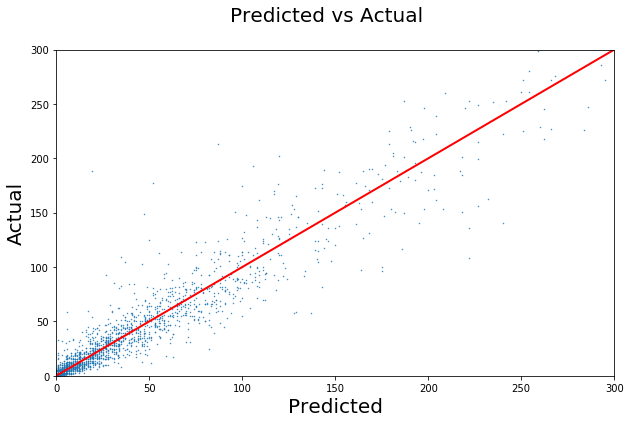

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(y_val, y_pred, s=0.2)
plt.xlim(-0,300)
plt.ylim(-0,300)
plt.plot([-0,300],[-0,300],color='r',linestyle= '-', linewidth=2)
plt.suptitle('Predicted vs Actual', fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

### Model Architecture 2

In [42]:
def build_model():
    model = Sequential()
    model.add(Dense(1024, kernel_regularizer = 'l2', activation = 'relu', input_dim = X_train.shape[1]))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae', 'msle'])
    return model

model = build_model()
model.summary()

history = model.fit(X_train, Y_train, epochs=50, verbose=1, batch_size = 64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1024)              67584     
_________________________________________________________________
dense_38 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_39 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 764,929
Trainable params: 764,929
Non-trainable params: 0
_________________________________________________________________
Epoc

8708/8708 [==============================] - 1s 103us/step - loss: 39.5061 - mean_absolute_error: 3.6147 - mean_squared_logarithmic_error: 0.1022
Epoch 46/50
8708/8708 [==============================] - 1s 101us/step - loss: 43.5894 - mean_absolute_error: 3.6731 - mean_squared_logarithmic_error: 0.0921
Epoch 47/50
8708/8708 [==============================] - 1s 102us/step - loss: 47.3588 - mean_absolute_error: 3.8241 - mean_squared_logarithmic_error: 0.0900
Epoch 48/50
8708/8708 [==============================] - 1s 104us/step - loss: 39.2624 - mean_absolute_error: 3.5293 - mean_squared_logarithmic_error: 0.0866
Epoch 49/50
8708/8708 [==============================] - 1s 102us/step - loss: 41.9714 - mean_absolute_error: 3.5706 - mean_squared_logarithmic_error: 0.0844
Epoch 50/50
8708/8708 [==============================] - 1s 103us/step - loss: 32.8984 - mean_absolute_error: 3.2264 - mean_squared_logarithmic_error: 0.0840


  Prediction  Actual
0     [31.0]    24.0
1      [1.0]     1.0
2     [33.0]    34.0
3     [35.0]    45.0
4      [2.0]     1.0


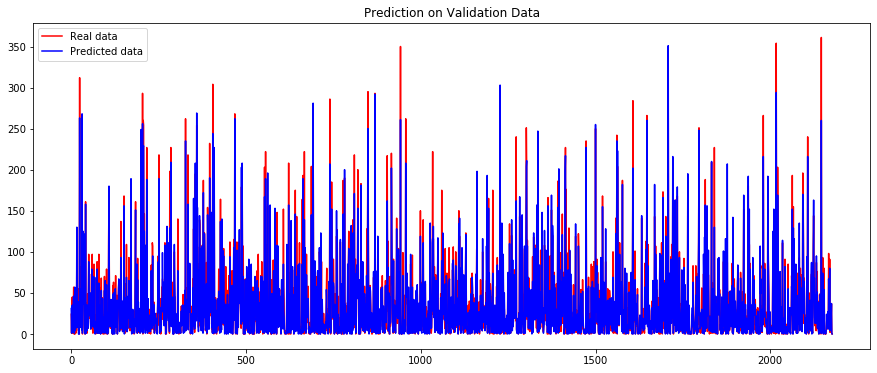

In [43]:
y_pred = model.predict(x_val)
y_pred =[np.round(value) for value in y_pred]

comparison_tbl = pd.DataFrame()
comparison_tbl["Prediction"] = y_pred
comparison_tbl["Actual"] = y_val
print(comparison_tbl[['Prediction','Actual']].head())


plt.figure(figsize=(15,6))
plt.plot(y_val, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction on Validation Data')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import explained_variance_score, mean_squared_error,r2_score, mean_squared_log_error, mean_absolute_error
# MSLE can not handle negative values
# EVS - It explains th total variance that is explained by varibles that are actually present and isn't due to error variance.

print(f'Explained Variance Score          : {explained_variance_score(y_val, y_pred)}')
print(f'Root Mean Squared Error           : {np.sqrt(mean_squared_error(y_val, y_pred))}')
print(f'Mean Squared Error                : {mean_absolute_error(y_val, y_pred)}')
print(f'R^2 Coefficient of Determination  : {r2_score(y_val, y_pred)}')
print(f'RMSLE Root Mean Squared Log Error : {np.sqrt(mean_squared_log_error(y_val, y_pred))}')

Explained Variance Score          : 0.906047611097461
Root Mean Squared Error           : 15.840834818601877
Mean Squared Error                : 9.112947658402204
R^2 Coefficient of Determination  : 0.9044827783380089
RMSLE Root Mean Squared Log Error : 0.5150273699414054


In [45]:
for loss_name, loss_value in zip(model.metrics_names, model.evaluate(x_val, y_val)):
    print(f'For {loss_name} loss is : {loss_value}')

2178/2178 [==============================] - 0s 206us/step
For loss loss is : 255.5235192720993
For mean_absolute_error loss is : 9.127467876897152
For mean_squared_logarithmic_error loss is : 0.2522826750854268


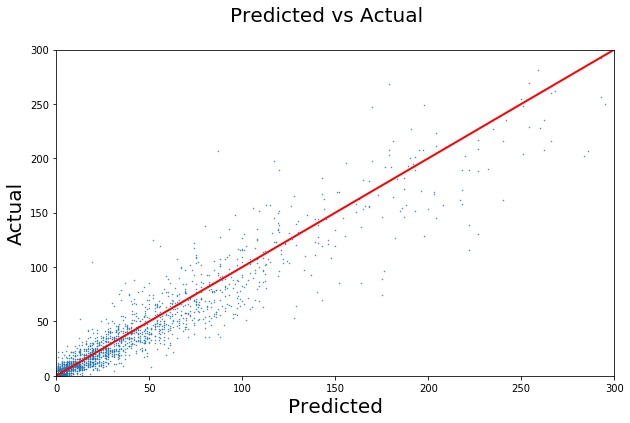

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(y_val, y_pred, s=0.2)
plt.xlim(-0,300)
plt.ylim(-0,300)
plt.plot([-0,300],[-0,300],color='r',linestyle= '-', linewidth=2)
plt.suptitle('Predicted vs Actual', fontsize=20)
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()